In [101]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
from matplotlib.ticker import LogLocator

In [102]:
diff = "5percent"
pressure = 15

# Set the detector size depending on the pressure
det_size = 1300
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/NextTonScale/0nubb_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/NextTonScale/Tl_ion_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/NextTonScale/Bi_ion_reco.h5", "meta")
Bi_meta["Type"] = "Bi"

Bkg_meta = pd.concat([Tl_meta, Bi_meta])
# Bkg_meta = pd.concat([Tl_meta])
display(Bkg_meta)

1300


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,625,0,1,5,13,100.917,2.463582,0.842084,0.786234,1.596004,0.786234,3.709724,2.052989,1.872315,1.031038,Primary,True,0nubb
0,626,0,1,0,26,204.947,2.454233,0.704816,0.314886,0.704816,0.248471,1.847346,1.366243,0.857403,0.555264,Primary,True,0nubb
0,627,0,1,6,25,174.591,2.456341,0.747819,0.623224,0.700600,0.474374,1.362832,1.181614,0.528909,0.442303,Primary,True,0nubb
0,628,0,1,0,12,143.996,2.329216,0.796030,0.584586,0.655340,0.423460,1.420305,1.079281,0.679186,0.201908,Primary,True,0nubb
0,628,1,0,20,20,0.000,0.122512,0.122512,0.122512,0.122512,0.122512,0.000000,0.000000,0.000000,0.000000,Brem,True,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,6772,3,0,21,21,0.000,0.029363,0.029363,0.029363,0.029363,0.029363,0.000000,0.000000,0.000000,0.000000,Brem,True,0nubb
0,6773,0,1,2,17,133.450,2.460433,1.006186,0.663946,1.006186,0.585354,2.170856,1.674434,1.314255,0.695207,Primary,True,0nubb
0,6774,0,1,0,15,112.658,2.460284,0.950658,0.605467,0.979898,0.526926,2.509668,1.608279,1.544349,0.920571,Primary,True,0nubb
0,6775,0,1,0,17,162.256,2.457680,0.855749,0.686290,0.759946,0.748439,2.278119,1.157022,1.435328,0.472384,Primary,True,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,2002000000,0,1,4,9,93.811,1.592656,0.653852,0.422890,0.745488,0.579080,2.375841,1.242690,1.726476,0.477485,Primary,True,Tl
0,2002000000,1,0,15,15,0.000,0.123603,0.123603,0.123603,0.123603,0.123603,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,2002000000,2,0,17,17,0.000,0.029636,0.029636,0.029636,0.029636,0.029636,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,2002000000,3,0,18,18,0.000,0.223200,0.223200,0.223200,0.223200,0.223200,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,2002000000,4,0,14,16,4.243,0.480078,0.480078,0.480078,0.480078,0.480078,1.000000,1.000000,0.000000,0.000000,Brem,True,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,20000182,0,1,11,16,109.278,1.979586,0.796105,0.356872,0.558694,0.288722,1.247084,1.100318,0.479959,0.330274,Primary,True,Bi
0,20000182,1,0,0,0,0.000,0.027478,0.027478,0.027478,0.027478,0.027478,0.000000,0.000000,0.000000,0.000000,Brem,True,Bi
0,20000182,2,0,1,1,0.000,0.104284,0.104284,0.104284,0.104284,0.104284,0.000000,0.000000,0.000000,0.000000,Brem,True,Bi
0,20000182,3,0,2,2,0.000,0.083030,0.083030,0.083030,0.083030,0.083030,0.000000,0.000000,0.000000,0.000000,Brem,True,Bi


In [103]:
nubb_events = len(nubb_meta.event_id.unique())
Bi_events = len(Bi_meta.event_id.unique())
Tl_events = len(Tl_meta.event_id.unique())
Bkg_events = len(Bkg_meta.event_id.unique())

print(nubb_events)
print(Bi_events)
print(Tl_events)
print(Bkg_events)

sf_bkg = nubb_events/Bkg_events
print("Bkg scale factor:", sf_bkg)

1038612
315377
2972774
3203975
Bkg scale factor: 0.3241635780553843


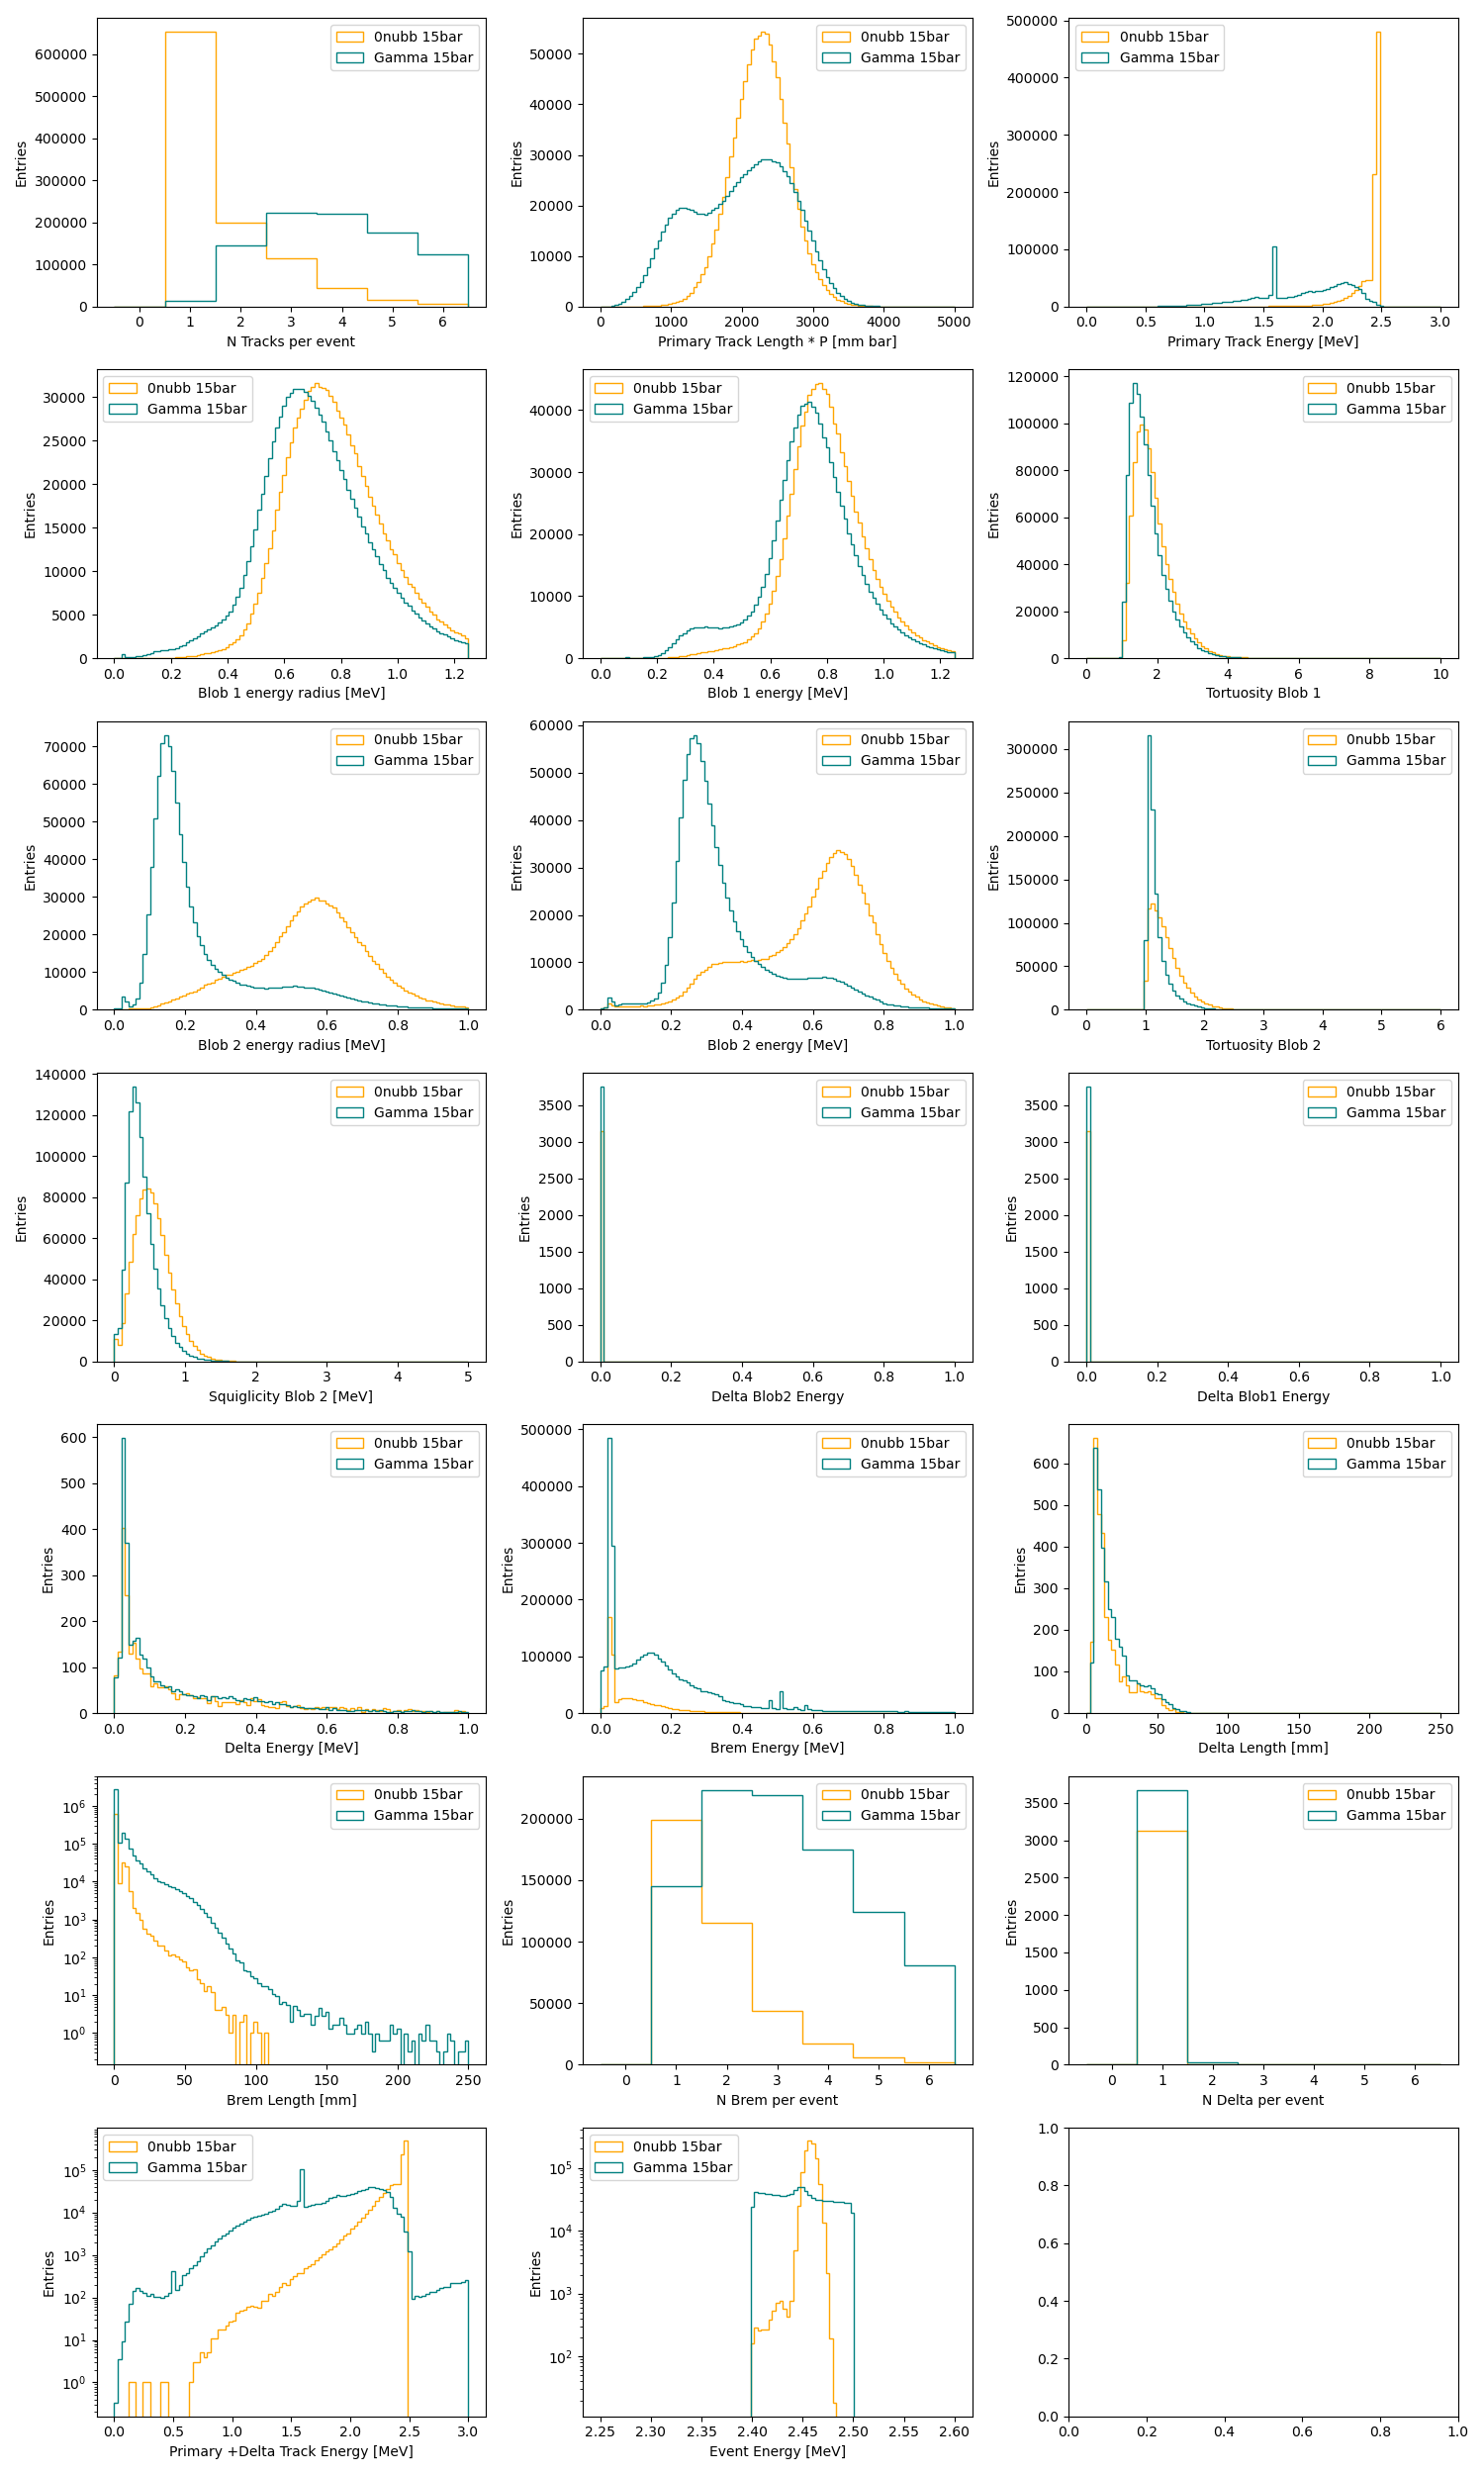

In [104]:
# Plot some variables like number of tracks
%matplotlib widget

def GetNLongTracks(df_meta):

    # Count unique trkID per event_id
    trk_counts = df_meta.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df


def GetLargestDelta(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    # Get the max energy value per event
    max_energy_per_event = filtered_df.groupby("event_id")["energy"].transform("max")

    # Keep only rows where energy matches the max per event
    return filtered_df[filtered_df["energy"] == max_energy_per_event]

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values


def PlotDistributions(df_meta, col, label, scale_factor):

    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    event_energy = df_meta.groupby("event_id").energy.sum()

    # Number of brems and deltas
    N_brem = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)


    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    df_primary = df_meta[df_meta.primary == 1]

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Define the weights
    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor
    weights_energy = np.ones_like(event_energy)       * scale_factor


    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()

    axs[0,1].hist(df_primary.length*pressure, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length * P [mm bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()

    axs[3,1].hist(deltas.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[3,1].set_xlabel("Delta Blob2 Energy")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()

    axs[3,2].hist(deltas.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[3,2].set_xlabel("Delta Blob1 Energy")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    axs[6,0].semilogy()

    axs[6,1].hist(event_energy, bins = np.linspace(2.25,2.6,100), histtype="step", color = col, label = label, weights = weights_energy);
    axs[6,1].set_xlabel("Event Energy [MeV]")
    axs[6,1].set_ylabel("Entries")
    axs[6,1].legend()
    axs[6,1].semilogy()

    plt.tight_layout()


fig, axs = plt.subplots(7, 3, figsize=(15, 25))
PlotDistributions(nubb_meta, "orange", f"0nubb {pressure}bar", 1)
PlotDistributions(Bkg_meta, "Teal", f"Gamma {pressure}bar", sf_bkg)



Text(0.5, 1.0, 'Background')

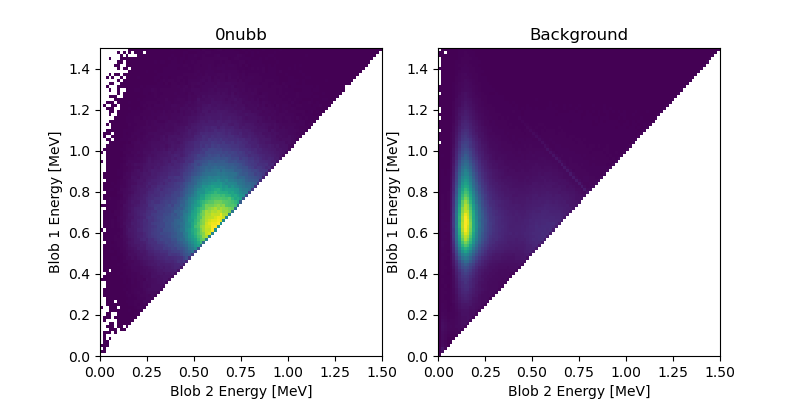

In [105]:
def Plot2Dhist(ax, varx, vary, bins):

    hist, xedges, yedges = np.histogram2d(varx, vary, bins=bins)

    # 2. Mask zero bins
    masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

    # 3. Create a custom colormap with white for the masked values (zero bins)
    cmap = plt.cm.viridis  # Choose a colormap you like
    cmap.set_bad(color='white')  # Set masked values (zeros) to white

    # 4. Plot the 2D histogram
    # pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap, norm=mcolors.LogNorm())
    pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

    # # Add color bar
    # plt.colorbar(pcm, ax=ax, label='Counts')

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
Plot2Dhist(axs[0], nubb_meta[nubb_meta.primary == 1].blob2R, nubb_meta[nubb_meta.primary == 1].blob1R, bins = [np.linspace(0, 1.5, 100), np.linspace(0,1.5, 100)])
axs[0].set_xlabel("Blob 2 Energy [MeV]")
axs[0].set_ylabel("Blob 1 Energy [MeV]")
axs[0].set_title(f"0nubb")

Plot2Dhist(axs[1], Bkg_meta[Bkg_meta.primary == 1].blob2R, Bkg_meta[Bkg_meta.primary == 1].blob1R, bins = [np.linspace(0, 1.5, 100), np.linspace(0,1.5, 100)])
axs[1].set_xlabel("Blob 2 Energy [MeV]")
axs[1].set_ylabel("Blob 1 Energy [MeV]")
axs[1].set_title(f"Background")


1038612 2972774 315377
[1038612  969930  614721  420787  321475]
[2972774 2084487   30132    1848     211]
[315377 276452  11270    625     70]
0.8765762880615898


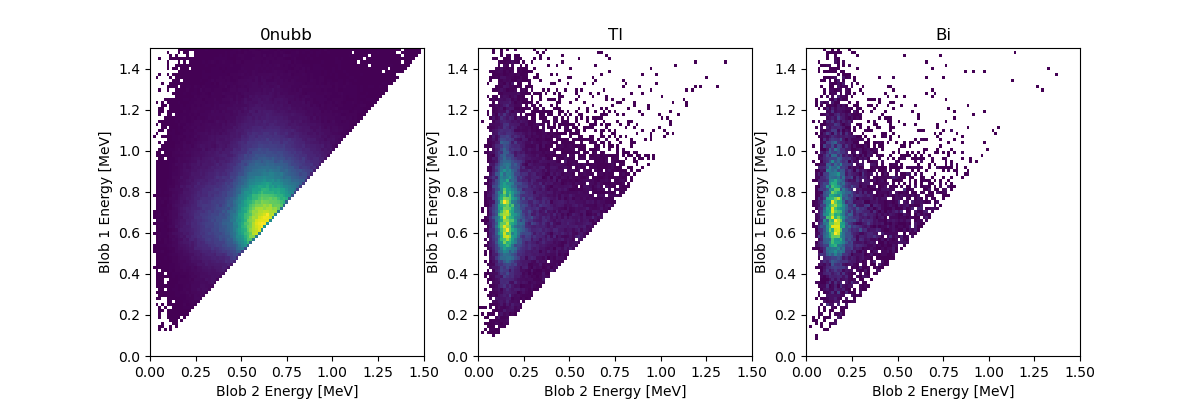

In [117]:
# Apply cuts in the following order
# 1. Energy within 2.4 - 2.5 MeV (should already be applied if no bugs...)
# 2. Containment
# 3. Single Track
# 4. Two Blobs > 0.4 MeV
# 0.5% ROI

# Cut out events with Brem in the name
def ApplyEnergyWindowCut(df_meta):

    event_energy = df_meta.groupby("event_id").energy.sum()
    good_events = event_energy[(event_energy >= 2.4) & (event_energy <= 2.5)].index
    df_meta = df_meta[df_meta["event_id"].isin(good_events)]

    return df_meta

# Cut out events with Brem in the name
def ApplyEventEnergyCut(df_meta, Eres):

    event_energy = df_meta.groupby("event_id").energy.sum()

    if (Eres == 0.5):
        good_events = event_energy[(event_energy >= 2.454) & (event_energy <= 2.471)].index # 0.5%
    else:
        good_events = event_energy[(event_energy >= 2.433) & (event_energy <= 2.48)].index # 1.0%
    
    df_meta = df_meta[df_meta["event_id"].isin(good_events)]

    return df_meta


def ApplyCutsNext1t(df_meta,axid):

    # Energy cut from 2.4 - 2.5 MeV -- should do nothing as already filtered
    FV_meta = ApplyEnergyWindowCut(df_meta)
    events_window = len(FV_meta.event_id.unique())

    # Apply FV containment
    contained_meta = FV_meta[FV_meta.contained == True]
    # contained_meta = FV_meta
    events_contained = len(contained_meta.event_id.unique())

    # Single Track Cut (should filter out only primaries too)
    df_counts = GetNLongTracks(contained_meta)
    df_counts = df_counts[df_counts.N_tracks == 1]
    single_track = contained_meta[contained_meta["event_id"].isin(df_counts.event_id.unique())]
    events_single = len(single_track.event_id.unique())

    Plot2Dhist(axs[axid], single_track.blob2R, single_track.blob1R, bins = [np.linspace(0, 1.5, 100), np.linspace(0,1.5, 100)])
    axs[axid].set_xlabel("Blob 2 Energy [MeV]")
    axs[axid].set_ylabel("Blob 1 Energy [MeV]")
    if axid == 0:
        axs[axid].set_title(f"0nubb")
    elif (axid == 1):
        axs[axid].set_title(f"Tl")
    else:
        axs[axid].set_title(f"Bi")

    # Two Blobs Cut
    # two_blobs = single_track[(single_track.blob1R > 0.4) & (single_track.blob2R > 0.4)]
    two_blobs = single_track[(single_track.blob2R > 0.50)]
    events_two_blobs = len(two_blobs.event_id.unique())

    # 0.5% Energy Resolution Cut
    ROI = ApplyEventEnergyCut(two_blobs, 0.5)
    events_ROI = len(ROI.event_id.unique())

    return np.array([events_window, events_contained, events_single, events_two_blobs, events_ROI])

print(nubb_events, Tl_events, Bi_events)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

nubb_events_cuts = ApplyCutsNext1t(nubb_meta, 0)
print(nubb_events_cuts)

Tl_events_cuts = ApplyCutsNext1t(Tl_meta, 1)
print(Tl_events_cuts)

Bi_events_cuts = ApplyCutsNext1t(Bi_meta, 2)
print(Bi_events_cuts)

print(Bi_events_cuts[1]/Bi_events_cuts[0])





Signal Efficiency: 24.139950870224688
Bi Acceptance: 1.5362613969123246e-08
Tl Acceptance: 3.986486675481348e-08
3.998


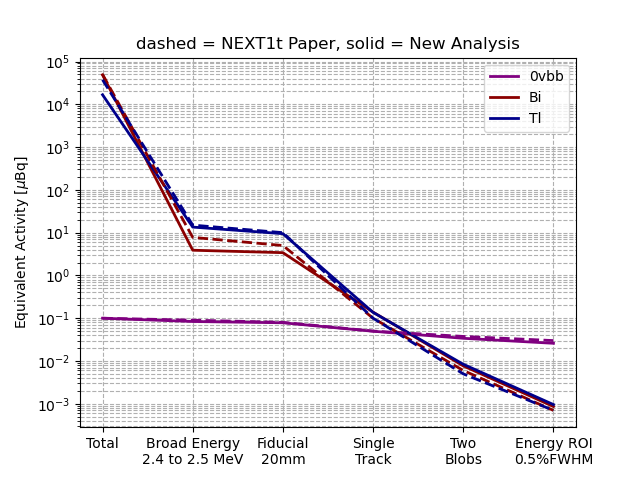

In [118]:
# 0nubb information from generation
nubb_N_gen      = 1240000
nubb_N_saved    = 1054112
nubb_N_savedWin = 1038612
nubb_N_savedC   = 967084
FV_nubb = nubb_N_savedC/nubb_N_savedWin # correction factor since my track reco containment is broken

# Bi_ion information from generation
Bi_N_gen        = 3972000000
Bi_N_saved      = 389617
Bi_N_savedWin   = 315377
Bi_N_savedC     = 274920
FV_Bi = Bi_N_savedC/Bi_N_savedWin # correction factor since my track reco containment is broken

# Tl_ion information from generation
Tl_N_gen         = 3680000000
Tl_N_saved       = 10252379
Tl_N_savedWin    = 2972774
Tl_N_savedC      = 2066891
FV_Tl = Tl_N_savedC/Tl_N_savedWin # correction factor since my track reco containment is broken

Act_0nubb = 0.1 # muBq
Act_Bi = 4.89e4 # muBq
Act_Tl = 1.67e4 # muBq

Cut_stage = ["Total", "Broad Energy\n2.4 to 2.5 MeV", "Fiducial\n20mm", "Single\nTrack", "Two\nBlobs", "Energy ROI\n0.5%FWHM"]
F_reg_0nubb = np.array([1, nubb_N_savedWin/nubb_N_gen, nubb_events_cuts[1]/nubb_N_gen, nubb_events_cuts[2]/nubb_N_gen, nubb_events_cuts[3]/nubb_N_gen, nubb_events_cuts[4]/nubb_N_gen])
F_reg_Bi    = np.array([1, Bi_N_savedWin/Bi_N_gen, Bi_events_cuts[1]/Bi_N_gen, Bi_events_cuts[2]/Bi_N_gen, Bi_events_cuts[3]/Bi_N_gen, Bi_events_cuts[4]/Bi_N_gen])
F_reg_Tl    = np.array([1, Tl_N_savedWin/Tl_N_gen, Tl_events_cuts[1]/Tl_N_gen, Tl_events_cuts[2]/Tl_N_gen, Tl_events_cuts[3]/Tl_N_gen, Tl_events_cuts[4]/Tl_N_gen])

fig, ax = plt.subplots()
ax.plot(Cut_stage, Act_0nubb * F_reg_0nubb, label = "0vbb", color = "purple", linewidth=2)
ax.plot(Cut_stage, Act_Bi * F_reg_Bi, label = "Bi", color = "darkred", linewidth=2)
ax.plot(Cut_stage, Act_Tl * F_reg_Tl, label = "Tl", color = "darkblue", linewidth=2)


ax.plot(Cut_stage, [1e-1, 9e-2,8e-2, 5e-2,3.75e-2,3e-2], color = "purple", linewidth=2, linestyle="--")
ax.plot(Cut_stage, [5e4, 7.75, 5, 1e-1, 6e-3, 7e-4], color = "darkred", linewidth=2, linestyle="--")
ax.plot(Cut_stage, [3.75e4, 1.5e1, 1e1, 1e-1, 5e-3, 7e-4], color = "darkblue", linewidth=2, linestyle="--")

ax.set_ylabel(r"Equivalent Activity [$\mu$Bq]")

ax.semilogy()
ax.grid(True, which="both", linestyle="--")
ax.legend()
ax.set_title("dashed = NEXT1t Paper, solid = New Analysis")

print("Signal Efficiency:", 100*FV_nubb*nubb_events_cuts[4]/nubb_N_gen)
print("Bi Acceptance:", FV_Bi*Bi_events_cuts[4]/Bi_N_gen)
print("Tl Acceptance:", FV_Tl*Tl_events_cuts[4]/Tl_N_gen)

print(3998000000/1e9)